# Irus Dataset
- [Source](http://archive.ics.uci.edu/ml/datasets/Iris)

In [33]:
import pandas
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  
plt.rcParams['figure.figsize'] = [10, 5]

In [34]:
dataset = pandas.read_csv ( os.getcwd() + '\\iris.data' )
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
### Adding Extra Colors

In [36]:
classes = [ dataset['class'] == 'Iris-setosa', dataset['class'] == 'Iris-versicolor', dataset['class'] == 'Iris-virginica' ]
colors = ['red', 'blue', 'green']
dataset['color'] = np.select( classes, colors )

### Plotting relationships

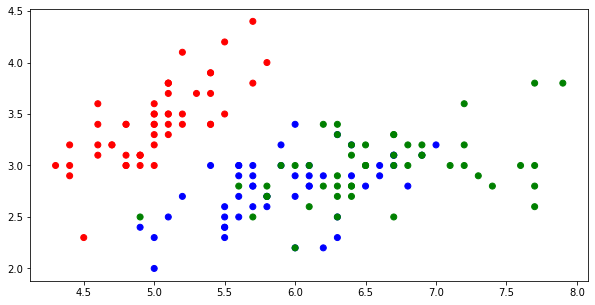

In [41]:
plt.scatter( dataset['sepal-length'], dataset['sepal-width'], c=dataset['color'] )

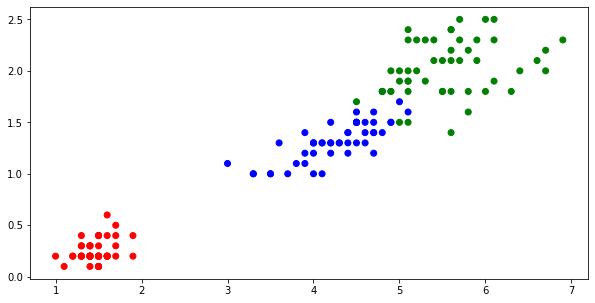

In [46]:
plt.scatter( dataset['petal-length'], dataset['petal-width'], c=dataset['color'] )

### LinearDiscriminantAnalysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [104]:
sepal_data_x = np.moveaxis(np.array([dataset['sepal-length'],dataset['sepal-width']]),0,-1)
sepal_data_y = np.moveaxis(np.array([dataset['color']]),0,-1).flatten()

clf = LinearDiscriminantAnalysis()
clf.fit( sepal_data_x, sepal_data_y)
print('Just Sepal Accuracy: ', 100 * clf.score( sepal_data_x, sepal_data_y) , '%')

Accuracy:  80.0 %


In [109]:
petal_data_x = np.moveaxis(np.array([dataset['petal-length'],dataset['petal-width']]),0,-1)
petal_data_y = np.moveaxis(np.array([dataset['color']]),0,-1).flatten()

clf = LinearDiscriminantAnalysis()
clf.fit( petal_data_x, petal_data_y)
print('Just Petal Accuracy: ', 100 * clf.score( petal_data_x, petal_data_y) , '%')

Just Petal Accuracy:  96.0 %


In [110]:
both_data_x = np.moveaxis(np.array([dataset['petal-length'],dataset['petal-width'],dataset['sepal-length'],dataset['sepal-width']]),0,-1)
both_data_y = np.moveaxis(np.array([dataset['color']]),0,-1).flatten()

clf = LinearDiscriminantAnalysis()
clf.fit( both_data_x, both_data_y)
print('Both Together: ', 100 * clf.score( both_data_x, both_data_y) , '%')

Both Together:  98.0 %


### Chart accuracy

In [111]:
predictions = clf.predict( both_data_x )

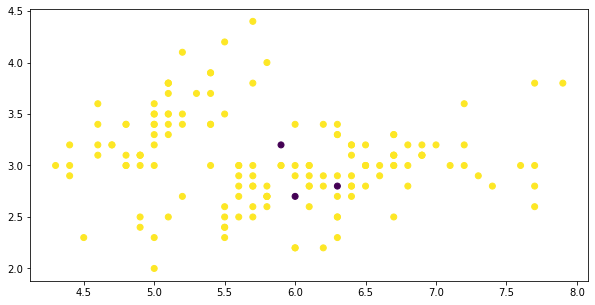

In [114]:
plt.scatter( dataset['sepal-length'], dataset['sepal-width'], c=(dataset['color']==predictions) )

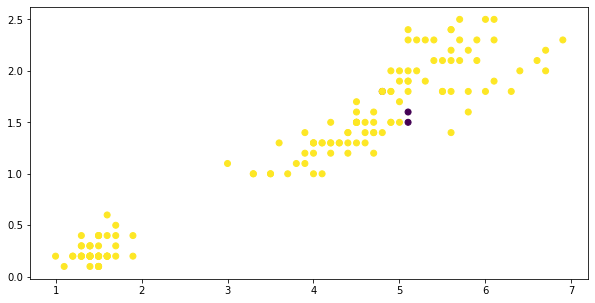

In [115]:
plt.scatter( dataset['petal-length'], dataset['petal-width'], c=(dataset['color']==predictions) )